In [22]:
using Revise
using HierarchicalDA
using LinearAlgebra
using Polynomials
using SpecialFunctions
using FastGaussQuadrature
using Distances
using KernelFunctions
using CairoMakie
using LaTeXStrings
using Test

In [23]:
Bn(x) = -n*zeta(n-1, x)

Bn (generic function with 1 method)

In [24]:
# Use definition of Bernoulli polynomials based on zeta function
Bernoulli(n::Float64, x) = -n*zeta(1-n, x)

Bernoulli (generic function with 1 method)

In [25]:
B6 = Polynomial([1/42; 0; -1/2; 0; 5/2; -3; 1])
@test isapprox(Bernoulli(6., 0.1), B6(0.1), atol = 100eps())

Test Passed

In [26]:
modf(0.878)[1]

0.878

In [27]:
struct BernoulliKernel <: KernelFunctions.SimpleKernel 
    order::Float64
end

KernelFunctions.kappa(k::BernoulliKernel, d2::Real) = 1.0 + (-1.0)^(k.order/2-1)*Bernoulli(k.order, d2)/gamma(k.order+1)
KernelFunctions.metric(k::BernoulliKernel) = Euclidean()

In [44]:
polydeg = 3
Ncells = 100

Nx = (polydeg+1)*Ncells
Ny = ceil(Int64, Nx/2)

# Define Trixi system for inviscid Burgers equation
sys_burgers = setup_burgers(polydeg, Ncells);

xgrid = vec(sys_burgers.mesh.md.xq);
x̃grid = 0.5*(xgrid .+ 1);

In [49]:
k2 = BernoulliKernel(10)

BernoulliKernel(10.0)

In [50]:
K = zeros(length(xgrid), length(xgrid))
    
for (j, x̃j) in enumerate(x̃grid)
    for (i, x̃i) in enumerate(x̃grid)
        K[i,j] = 1.0 + (-1.0)^(k2.order/2-1)*Bernoulli(k2.order, mod(x̃i - x̃j, 1))/gamma(k2.order+1)
    end
end
# kernelmatrix(k2, 0.5*(xgrid .+ 1))

In [51]:
floor(0.1)

0.0

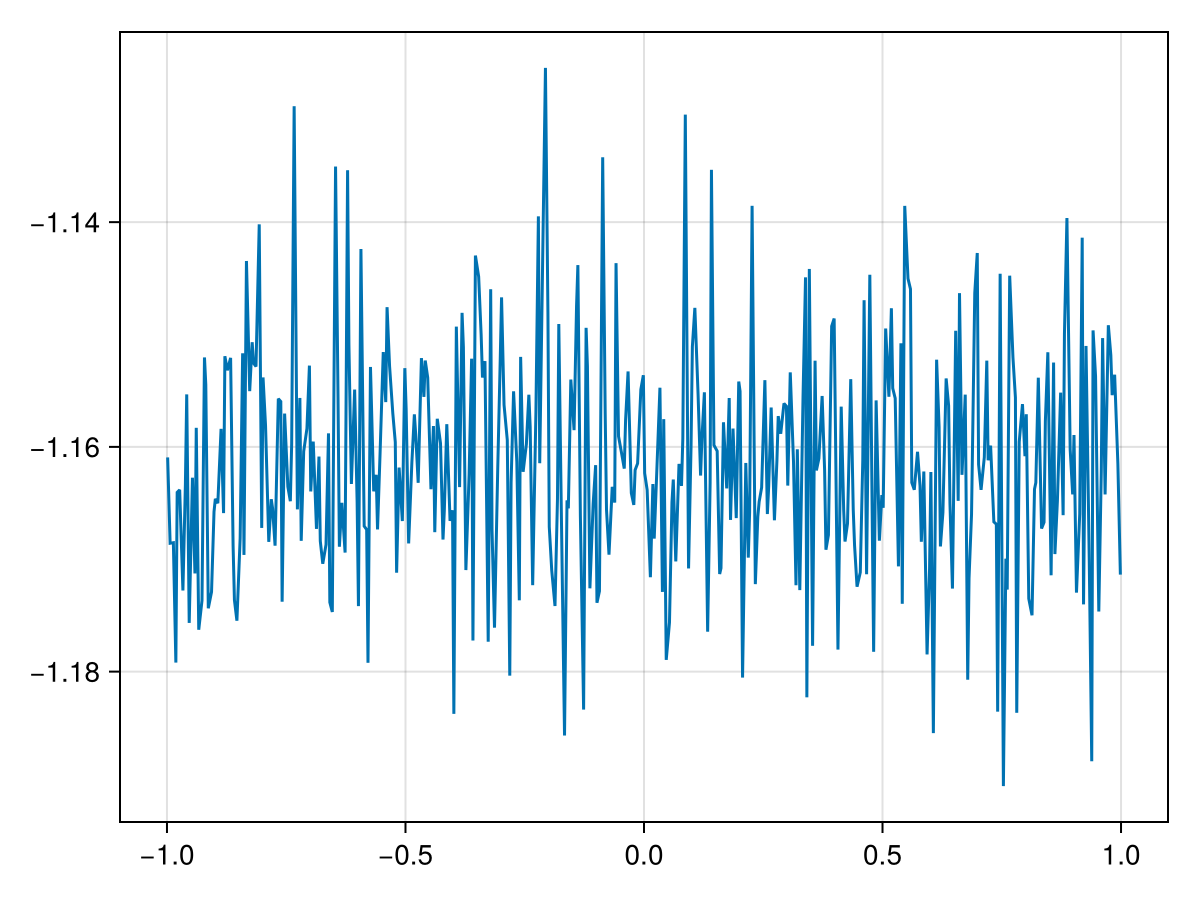

In [52]:
lines(xgrid, cholesky(Symmetric(K) + 1e-4*I).L*randn(400))

In [76]:
k2(nodes, nodes)

LoadError: MethodError: no method matching PeriodicEuclidean()

[0mClosest candidates are:
[0m  PeriodicEuclidean([91m::W[39m) where W
[0m[90m   @[39m [32mDistances[39m [90m~/.julia/packages/Distances/n9q0L/src/[39m[90m[4mmetrics.jl:78[24m[39m


In [64]:
nodes = gausslegendre(100)[1]

100-element Vector{Float64}:
 -0.9997137267734413
 -0.9984919506395958
 -0.9962951347331251
 -0.9931249370374434
 -0.9889843952429918
 -0.983877540706057
 -0.9778093584869183
 -0.9707857757637063
 -0.9628136542558156
 -0.9539007829254917
 -0.944055870136256
 -0.9332885350430795
 -0.921609298145334
  ⋮
  0.9332885350430795
  0.944055870136256
  0.9539007829254917
  0.9628136542558156
  0.9707857757637063
  0.9778093584869183
  0.983877540706057
  0.9889843952429918
  0.9931249370374434
  0.9962951347331251
  0.9984919506395958
  0.9997137267734413

In [ ]:
function BernoulliKernel
    
    
end

In [61]:
Bernoulli(2, 0.0)

0.16666666666666677

In [60]:
B2(0.1)

0.07666666666666665

In [2]:
B0 = Polynomial(0)

Polynomial(0)

In [6]:
B1 = Polynomial([-1/2, 1])

Polynomial(-0.5 + 1.0*x)

In [7]:
B2 = Polynomial([1/6, -1, 1])

Polynomial(0.16666666666666666 - 1.0*x + 1.0*x^2)

In [44]:
function generate_bernoulli(order::Int64)
    Bern = Polynomial[]
    
    P1 = Polynomial([0,1])
    
    B0 = Polynomial(1)
    
    push!(Bern, B0)
        
    for m=1:order
        Bm = Polynomial(0)
        for k=0:m
            @show m, m-k
            Bm += binomial(m, k)*Bern[m-k]*P1^k
        end
        push!(Bern, Bm)
    end
    return Bern
end 

generate_bernoulli (generic function with 1 method)

In [48]:
function bernoulli_polynomial(m::Int)
    if m == 0
        return Polynomial([1])
    elseif m == 1
        return Polynomial([1//2, -1//2])
    else
        b = zeros(Rational{BigInt}, m+1)
        b[1] = 1//2
        for j in 1:m-1
            for k in m:-1:j+1
                b[k] -= binomial(k, j) * b[j+1] / (k - j)
            end
        end
        return Polynomial(reverse(b))
    end
end

# Example usage
m = 3
bernoulli_poly = bernoulli_polynomial(m)
println(bernoulli_poly)

1//2*x^3


In [49]:
?integrate

search: integrate integrand_extended_dist log_integrand_extended_dist isintegral



```
integrate(p::AbstractPolynomial)
```

Return an antiderivative for `p`

---

```
integrate(::AbstractPolynomial, C)
```

Returns the indefinite integral of the polynomial with constant `C` when expressed in the standard basis.

---

```
integrate(::AbstractPolynomial, a, b)
```

Compute the definite integral of the given polynomial from `a` to `b`. Will throw an error if either `a` or `b` are out of the polynomial's domain.


In [50]:
?zeta

search: Csize_t Cssize_t sizehint! ZeroPivotException

Couldn't find zeta
Perhaps you meant Meta, zero, det, Set, get, get!, let, zeros, zip, Bern or Out


No documentation found.

Binding `zeta` does not exist.


In [45]:
generate_bernoulli(1)

(m, m - k) = (1, 1)
(m, m - k) = (1, 0)


LoadError: BoundsError: attempt to access 1-element Vector{Polynomial} at index [0]